In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(141592653)

# Set parameters

In [16]:
n = 2000 # sample size
c = 1/5 # p/n
beta = 1/2 # L/p

p = int(c*n) # dimension
L = int(beta*p) # band size

k = 2 # number of classes
pi = np.array([0.5, 0.5]) # proportion of each class
# centroid of each class
mu = stats.norm.rvs(size=(p, 1))
mu_norm = 1.5
mu = mu_norm*mu/np.linalg.norm(mu)
M = np.concatenate([+mu, -mu], axis=1)
# M = np.zeros((p, k))

# k = 2 # number of classes
# pi = np.array([0.5, 0.5]) # proportion of each class
# # centroid of each class
# M = stats.multivariate_normal.rvs(cov=np.kron(np.array([[10., 5.5], [5.5, 15.]]), np.eye(p))/p).reshape((p, k))

# k = 3 # number of classes
# pi = np.array([0.5, 0.3, 0.2]) # proportion of each class
# # centroid of each class
# M = stats.multivariate_normal.rvs(cov=np.kron(np.array([[10., 5.5, 2.],
#                                                         [5.5, 15., 4.],
#                                                         [2., 4., 12.]]), np.eye(p))/p).reshape((p, k))

J = utils.getJ(n, pi)
nbMC = 10 # number of Monte-Carlo simulations
n_eigvecs = 5 # number of computed eigenvectors
setting = "$n = {} \quad p = {} \quad L = {}$".format(n, p, L)

# Computations

**Limiting spectral distribution**: we use the fact that, if $m$ is the Stieltjes transform of a measure which has a density $d(x)$ in $x$, then
$$
d(x) = \frac{1}{\pi} \lim_{y \downarrow 0} \Im \left[ m(x + \mathrm{i} y) \right].
$$

In [17]:
# Simulations
eigvals_t, eigvecs_t = utils.simul(nbMC, p, n, k, M, J, L, mask='toeplitz', comp=False)
eigvals_c, eigvecs_c = utils.simul(nbMC, p, n, k, M, J, L, mask='circulant', comp=False)

# Limiting spectral distribution
axr = np.linspace(eigvals_c.min(), eigvals_c.max(), 1000)
eta0 = utils.eta0(axr, p, n, L)
LSD = (1/(1-axr-eta0)).imag/np.pi

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.14it/s]


In [18]:
nu_k = utils.nu(L, 2*np.pi*np.arange(n)/n)
kk, mm = np.mgrid[:n, :n]
nu_kk = utils.nu(L, 2*np.pi*kk/n)
nu_mm = utils.nu(L, 2*np.pi*mm/n)
spikes = (mu_norm**2+1)*nu_k*(1/p+np.mean(nu_mm/((mu_norm**2+1)*nu_kk-nu_mm), axis=1))

# Visualisation

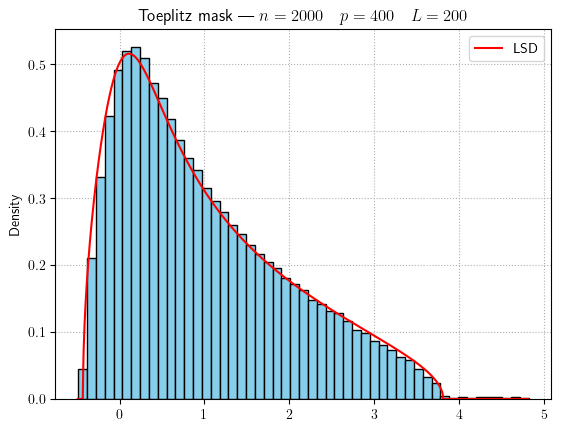

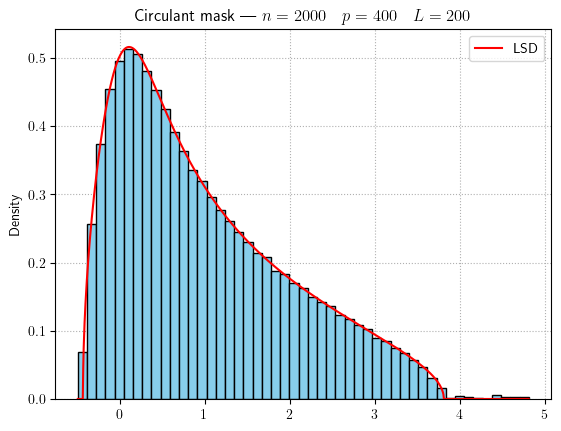

In [19]:
plt.hist(eigvals_t.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD, color='red', label="LSD")
plt.grid(ls=':')
plt.ylabel("Density")
plt.legend()
plt.title("Toeplitz mask | "+setting)
plt.show()

plt.hist(eigvals_c.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD, color='red', label="LSD")
plt.grid(ls=':')
plt.ylabel("Density")
plt.legend()
plt.title("Circulant mask | "+setting)
plt.show()

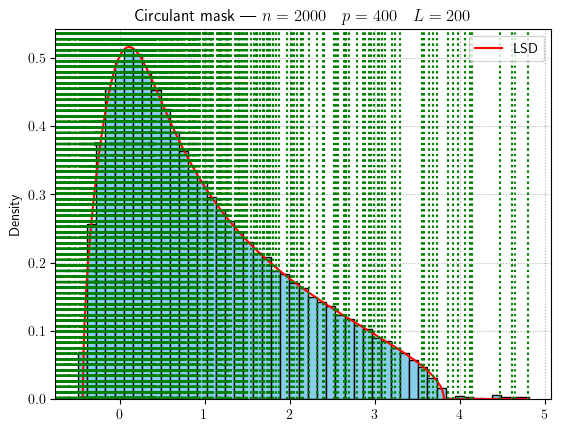

In [20]:
plt.hist(eigvals_c.flatten(), bins='auto', color='skyblue', edgecolor='black', density=True, zorder=2)
plt.plot(axr, LSD, color='red', label="LSD")
xmin, xmax = plt.xlim()
for spike in spikes:
    plt.axvline(x=spike, ls=':', color='green')
plt.xlim(xmin, xmax)
plt.grid(ls=':')
plt.ylabel("Density")
plt.legend()
plt.title("Circulant mask | "+setting)
plt.show()

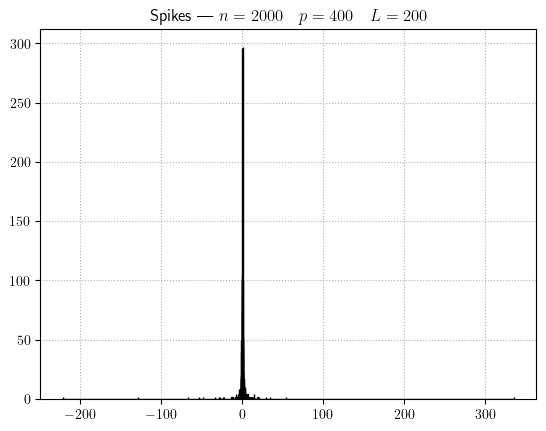

In [21]:
plt.hist(spikes, bins='auto', edgecolor='black', zorder=2)
plt.grid(ls=':')
plt.title("Spikes | "+setting)
plt.show()